In [1]:
import xcube
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regionmask
import seaborn as sns
from scalecast.Forecaster import Forecaster
from scalecast.SeriesTransformer import SeriesTransformer
from sklearn.preprocessing import MinMaxScaler

/home/conda/deepesdl/cf7ebab7e67256aadc026f6b16fdaf2c2168f8fa9a61a0e89fdebfc318aea481-20240410-122852-463180-425-xcube-1.4.1/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
from xcube.core.store import new_data_store
store = new_data_store("s3", root="deep-esdl-public", storage_options=dict(anon=True))
store.list_data_ids()

/home/conda/deepesdl/cf7ebab7e67256aadc026f6b16fdaf2c2168f8fa9a61a0e89fdebfc318aea481-20240410-122852-463180-425-xcube-1.4.1/lib/python3.11/site-packages/xcube/util/plugin.py:182: UserWarning: Initializing xcube plugin 'xcube_cmems' took 126 ms, consider code optimization. (For example, avoid eager import of packages, consider lazy loading of resources, etc.)
  warnings.warn(


['LC-1x2160x2160-1.0.0.levels',
 'SMOS-freezethaw-1x720x720-1.0.1.zarr',
 'SMOS-freezethaw-4267x10x10-1.0.1.zarr',
 'black-sea-1x1024x1024.levels',
 'black-sea-256x128x128.zarr',
 'esa-cci-permafrost-1x1151x1641-0.0.2.levels',
 'esdc-8d-0.25deg-1x720x1440-3.0.1.zarr',
 'esdc-8d-0.25deg-256x128x128-3.0.1.zarr',
 'hydrology-1D-0.009deg-100x60x60-3.0.2.zarr',
 'hydrology-1D-0.009deg-1418x70x76-2.0.0.zarr',
 'hydrology-1D-0.009deg-1x1102x2415-2.0.0.levels',
 'hydrology-1D-0.009deg-1x1102x966-3.0.2.levels',
 'ocean-1M-9km-1x1080x1080-1.4.0.levels',
 'ocean-1M-9km-64x256x256-1.4.0.zarr',
 'polar-100m-1x2048x2048-1.0.1.zarr']

In [3]:
cube = store.open_data('esdc-8d-0.25deg-1x720x1440-3.0.1.zarr')

In [4]:
# sif_gosif 
cube = cube.sel(time=slice('2002-01-01','2021-12-31'))

In [5]:
cube 

<xarray.Dataset> Size: 164GB
Dimensions:                            (time: 920, lat: 720, lon: 1440)
Coordinates:
  * lat                                (lat) float64 6kB -89.88 -89.62 ... 89.88
  * lon                                (lon) float64 12kB -179.9 ... 179.9
  * time                               (time) datetime64[ns] 7kB 2002-01-05 ....
Data variables: (12/42)
    aerosol_optical_thickness_550      (time, lat, lon) float32 4GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    air_temperature_2m                 (time, lat, lon) float32 4GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    bare_soil_evaporation              (time, lat, lon) float32 4GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    burnt_area                         (time, lat, lon) float64 8GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cot                                (time, lat, lon) float32 4GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    cth                                (time, lat, lon) float32 4GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    ...                                 ...
    sif_rtsif                          (time, lat, lon) float32 4GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    sm                                 (time, lat, lon) float32 4GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    snow_sublimation                   (time, lat, lon) float32 4GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    surface_moisture                   (time, lat, lon) float32 4GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    terrestrial_ecosystem_respiration  (time, lat, lon) float32 4GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    transpiration                      (time, lat, lon) float32 4GB dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
Attributes: (12/23)
    Conventions:                CF-1.9
    acknowledgment:             All ESDC data providers are acknowledged insi...
    contributor_name:           ['University of Leipzig', 'Max Planck Institu...
    contributor_url:            ['https://www.uni-leipzig.de/', 'https://www....
    creator_name:               ['University of Leipzig', 'Brockmann Consult ...
    creator_url:                ['https://www.uni-leipzig.de/', 'https://www....
    ...                         ...
    publisher_url:              https://www.earthsystemdatalab.net/
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        1979-01-05T00:00:00.000000000
    time_period:                8D
    time_period_reported_day:   5.0
    title:                      Earth System Data Cube (ESDC) v3.0.1

In [6]:
regionmask.defined_regions.giorgi.map_keys('Northern Europe')

11

In [7]:
lon_min, lon_max = 5.866, 15.042
lat_min, lat_max = 47.270, 55.058

In [8]:
cube_ger = cube.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

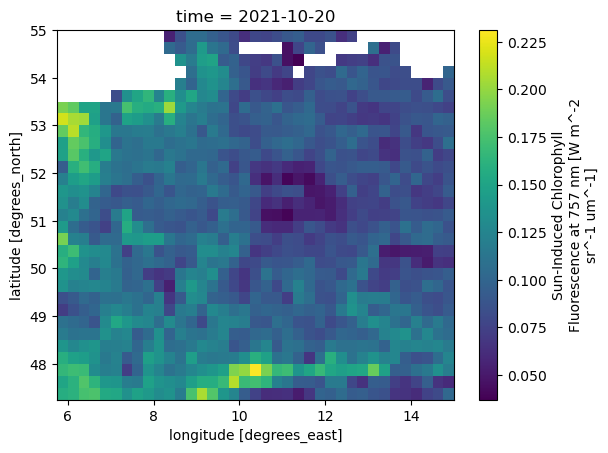

In [9]:
cube_ger.sif_gosif.isel(time=910).plot()

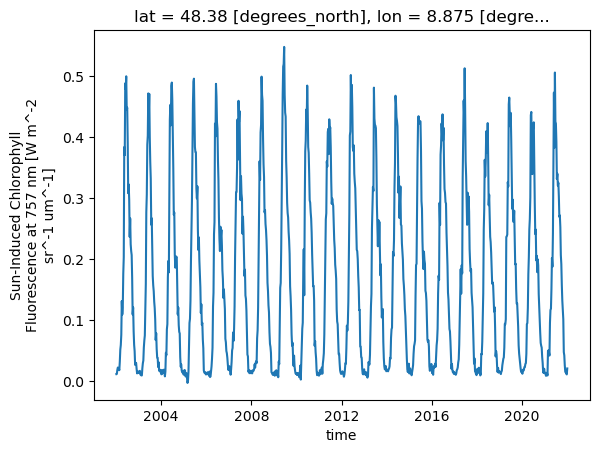

In [9]:
cube_ger.sif_gosif.isel(lat=4, lon=12).plot()

CNN 

In [10]:
ts_one = cube_ger.isel(lat=4, lon=12).to_dataframe()

In [12]:
ts_one_filter = ts_one[['sif_gosif','kndvi','radiation_era5','air_temperature_2m','root_moisture']]
list(ts_one_filter.columns)

['sif_gosif', 'kndvi', 'radiation_era5', 'air_temperature_2m', 'root_moisture']

In [14]:
X_train, y_train 

TypeError: 'tuple' object is not callable

Alt 

In [10]:
ts_one = cube_ger.sif_gosif.isel(lat=4, lon=12).to_dataframe()
#ts_one = ts_one.index.resample('D')
#ts_one['time'] = ts_one.index
#ts_one = ts_one.dropna()



In [11]:
ts_one_D = ts_one.asfreq('d')
ts_one_D['sif_gosif'] = ts_one_D['sif_gosif'].interpolate(method='linear')
ts_one_D.head()

,lat,lon,sif_gosif
time,,,
2002-01-05,48.375,8.875,0.011712
2002-01-06,NaN,NaN,0.011765
2002-01-07,NaN,NaN,0.011817
2002-01-08,NaN,NaN,0.011870
2002-01-09,NaN,NaN,0.011922


In [12]:
f = Forecaster(
   y=ts_one['sif_gosif'],
   current_dates=ts_one.index)
f

Forecaster(
    DateStartActuals=2002-01-05T00:00:00.000000000
    DateEndActuals=2021-12-31T00:00:00.000000000
    Freq=None
    N_actuals=920
    ForecastLength=0
    Xvars=[]
    TestLength=0
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

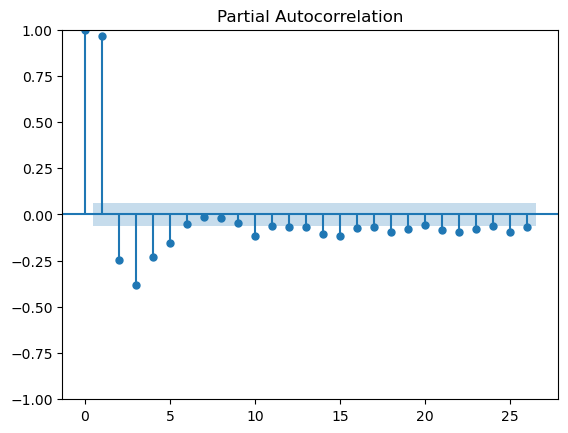

In [13]:
f.plot_pacf(lags=26)
plt.show()

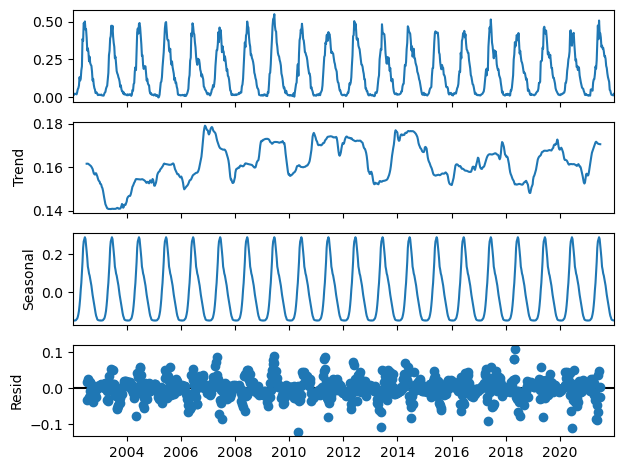

In [14]:
#f.seasonal_decompose(period=46).plot() # (365/8 =46; dates every 8 days, period one year)
f.seasonal_decompose(period=46).plot()
plt.show()

In [15]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

2024-05-27 12:50:15.178492: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-27 12:50:22.721122: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2991
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - loss: 0.3014 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step


/home/imkeott/.local/lib/python3.11/site-packages/scalecast/_utils.py:60: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

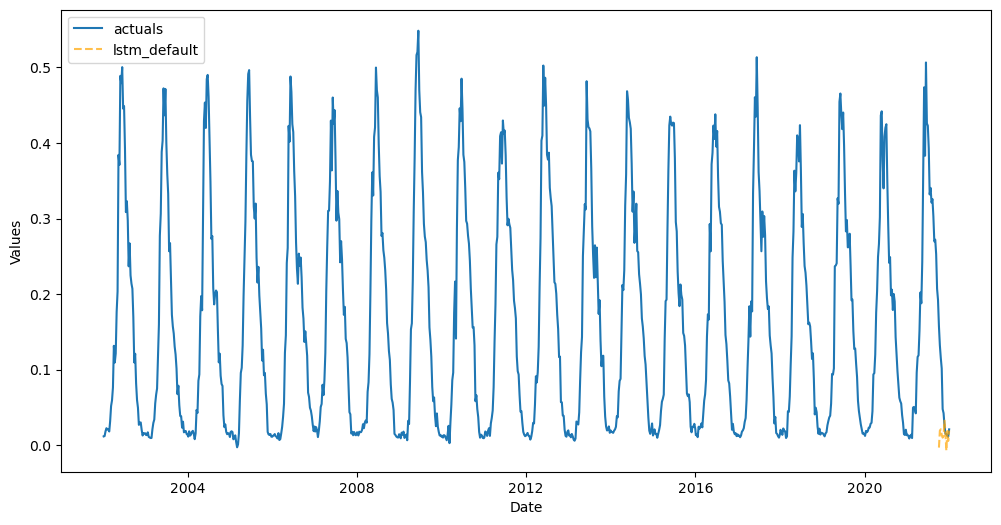

In [16]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3047  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3211
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


/home/imkeott/.local/lib/python3.11/site-packages/scalecast/_utils.py:60: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
/home/imkeott/.local/lib/python3.11/site-packages/scalecast/_utils.py:60: Warning: Confidence intervals not found for lstm_24lags. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

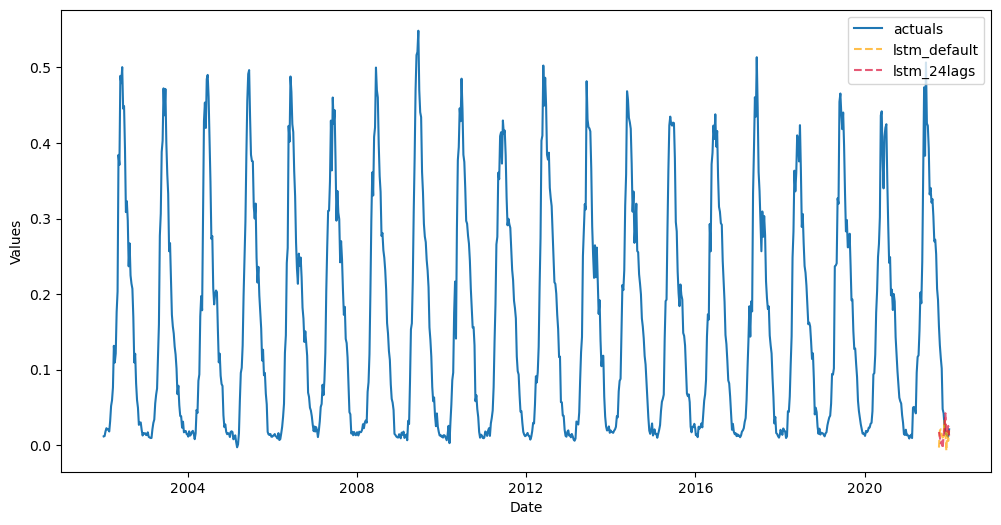

In [17]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

In [18]:
transformer = SeriesTransformer(f)
f = transformer.DiffTransform()

In [19]:
f.add_ar_terms(24)
f.add_seasonal_regressors('month','quarter',dummy=True)
f.add_seasonal_regressors('year')
f.add_time_trend()

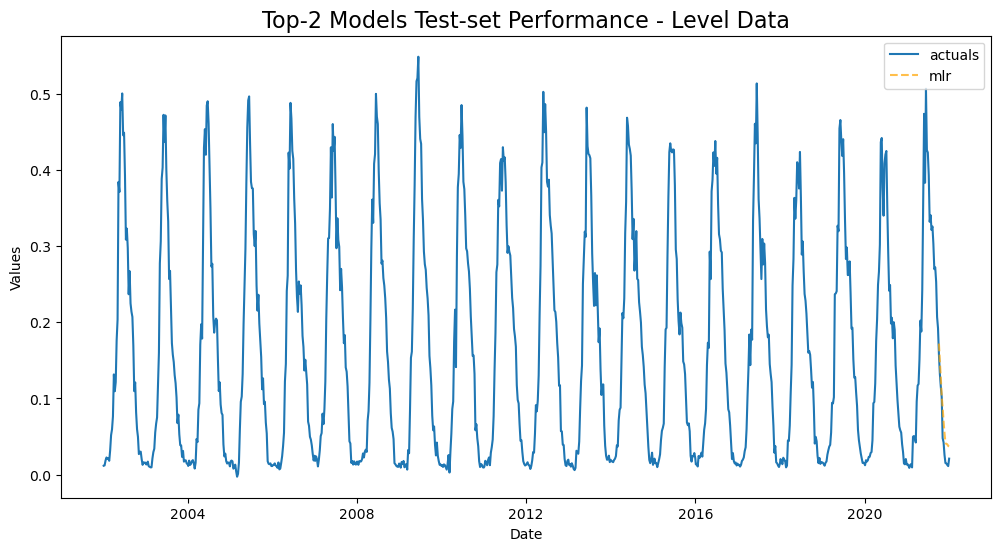

In [20]:
f.set_estimator('mlr')
f.manual_forecast()

f = transformer.DiffRevert(
    exclude_models = [m for m in f.history if m != 'mlr']
) # exclude all lstm models from the revert

f.plot_test_set(order_by='TestSetMAPE',models=['lstm_best','mlr'])
plt.title('Top-2 Models Test-set Performance - Level Data',size=16)
plt.show()

In [75]:
ts_one.head()

,lat,lon,sif_gosif
time,,,
2002-01-05,48.375,8.875,0.011712
2002-01-13,48.375,8.875,0.012132
2002-01-21,48.375,8.875,0.018472
2002-01-29,48.375,8.875,0.022544
2002-02-06,48.375,8.875,0.020968


In [21]:
# https://towardsdatascience.com/a-quick-deep-learning-recipe-time-series-forecasting-with-keras-in-python-f759923ba64
def convert2matrix(data_arr, look_back):
   X, Y =[], []
   for i in range(len(data_arr)-look_back):
       d=i+look_back  
       X.append(data_arr[i:d,])
       Y.append(data_arr[d,])
   return np.array(X), np.array(Y)

In [22]:
df_arr= ts_one.sif_gosif 
ts_one.sif_gosif = df_arr.astype('float32')
df_arr = np.reshape(df_arr, (-1, 1)) #LTSM requires more input features compared to RNN or DNN
scaler = MinMaxScaler(feature_range=(0, 1))#LTSM is senstive to the scale of features
df_arr = scaler.fit_transform(df_arr)

In [23]:
train_size = 400
test_size = len(df_arr)-train_size
train, test = df_arr[0:train_size,:], df_arr[train_size:len(df_arr),:]
look_back = 30
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
def model_lstm(look_back):
    model=Sequential()
    model.add(LSTM(100, input_shape=(1, look_back), activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [27]:
model=model_lstm(look_back)

history = model.fit(trainX, trainY, epochs=100, batch_size=30, validation_data=(testX, testY), callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

Epoch 1/100


/home/imkeott/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1247 - mae: 0.2397 - mse: 0.1247 - val_loss: 0.0930 - val_mae: 0.2250 - val_mse: 0.0930
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0738 - mae: 0.1886 - mse: 0.0738 - val_loss: 0.0531 - val_mae: 0.1609 - val_mse: 0.0531
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0467 - mae: 0.1419 - mse: 0.0467 - val_loss: 0.0308 - val_mae: 0.1095 - val_mse: 0.0308
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0310 - mae: 0.1164 - mse: 0.0310 - val_loss: 0.0194 - val_mae: 0.0941 - val_mse: 0.0194
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0230 - mae: 0.1079 - mse: 0.0230 - val_loss: 0.0144 - val_mae: 0.0847 - val_mse: 0.0144
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0182 - mae: 0.0962 - mse: 0.0182 - val_loss: 0.0111 - val_mae: 0.0727 - val_mse: 0.0111
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0145 - mae: 0.0825 - mse: 0.0145 - val_loss: 0.0090 - va

In [28]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([testY])
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '% (np.sqrt(mean_squared_error(trainY[0], train_predict[:,0])),(mean_absolute_error(trainY[0], train_predict[:,0]))))
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f '% (np.sqrt(mean_squared_error(testY[0], test_predict[:,0])),(mean_absolute_error(testY[0], test_predict[:,0]))))
model_loss(history)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step


ValueError: Found array with dim 3. None expected <= 2.

In [36]:
cube_ger

<xarray.Dataset> Size: 182MB
Dimensions:                            (time: 920, lat: 31, lon: 37)
Coordinates:
  * lat                                (lat) float64 248B 47.38 47.62 ... 54.88
  * lon                                (lon) float64 296B 5.875 6.125 ... 14.88
  * time                               (time) datetime64[ns] 7kB 2002-01-05 ....
Data variables: (12/42)
    aerosol_optical_thickness_550      (time, lat, lon) float32 4MB dask.array<chunksize=(1, 31, 37), meta=np.ndarray>
    air_temperature_2m                 (time, lat, lon) float32 4MB dask.array<chunksize=(1, 31, 37), meta=np.ndarray>
    bare_soil_evaporation              (time, lat, lon) float32 4MB dask.array<chunksize=(1, 31, 37), meta=np.ndarray>
    burnt_area                         (time, lat, lon) float64 8MB dask.array<chunksize=(1, 31, 37), meta=np.ndarray>
    cot                                (time, lat, lon) float32 4MB dask.array<chunksize=(1, 31, 37), meta=np.ndarray>
    cth                                (time, lat, lon) float32 4MB dask.array<chunksize=(1, 31, 37), meta=np.ndarray>
    ...                                 ...
    sif_rtsif                          (time, lat, lon) float32 4MB dask.array<chunksize=(1, 31, 37), meta=np.ndarray>
    sm                                 (time, lat, lon) float32 4MB dask.array<chunksize=(1, 31, 37), meta=np.ndarray>
    snow_sublimation                   (time, lat, lon) float32 4MB dask.array<chunksize=(1, 31, 37), meta=np.ndarray>
    surface_moisture                   (time, lat, lon) float32 4MB dask.array<chunksize=(1, 31, 37), meta=np.ndarray>
    terrestrial_ecosystem_respiration  (time, lat, lon) float32 4MB dask.array<chunksize=(1, 31, 37), meta=np.ndarray>
    transpiration                      (time, lat, lon) float32 4MB dask.array<chunksize=(1, 31, 37), meta=np.ndarray>
Attributes: (12/23)
    Conventions:                CF-1.9
    acknowledgment:             All ESDC data providers are acknowledged insi...
    contributor_name:           ['University of Leipzig', 'Max Planck Institu...
    contributor_url:            ['https://www.uni-leipzig.de/', 'https://www....
    creator_name:               ['University of Leipzig', 'Brockmann Consult ...
    creator_url:                ['https://www.uni-leipzig.de/', 'https://www....
    ...                         ...
    publisher_url:              https://www.earthsystemdatalab.net/
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        1979-01-05T00:00:00.000000000
    time_period:                8D
    time_period_reported_day:   5.0
    title:                      Earth System Data Cube (ESDC) v3.0.1

In [45]:
variables = [
    'sif_gosif',
    'radiation_era5',
    'root_moisture',
    'air_temperature_2m'
]
ts_two = cube_ger[variables].isel(lat=4, lon=12).to_dataframe()

In [46]:
ts_two.head()

,sif_gosif,radiation_era5,root_moisture,air_temperature_2m,lat,lon
time,,,,,,
2002-01-05,0.011712,125533.562500,0.407278,-8.606716,48.375,8.875
2002-01-13,0.012132,140352.828125,0.406534,-4.862808,48.375,8.875
2002-01-21,0.018472,108606.359375,0.407178,2.528912,48.375,8.875
2002-01-29,0.022544,158478.562500,0.409157,7.398394,48.375,8.875
2002-02-06,0.020968,195983.546875,0.409086,6.875784,48.375,8.875


In [47]:
data = ts_two

Epoch 1/50


/home/imkeott/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0247 - val_loss: 0.0049
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078 - val_loss: 0.0045
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - val_loss: 0.0025
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0036 - val_loss: 0.0022
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0022
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028 - val_loss: 0.0019


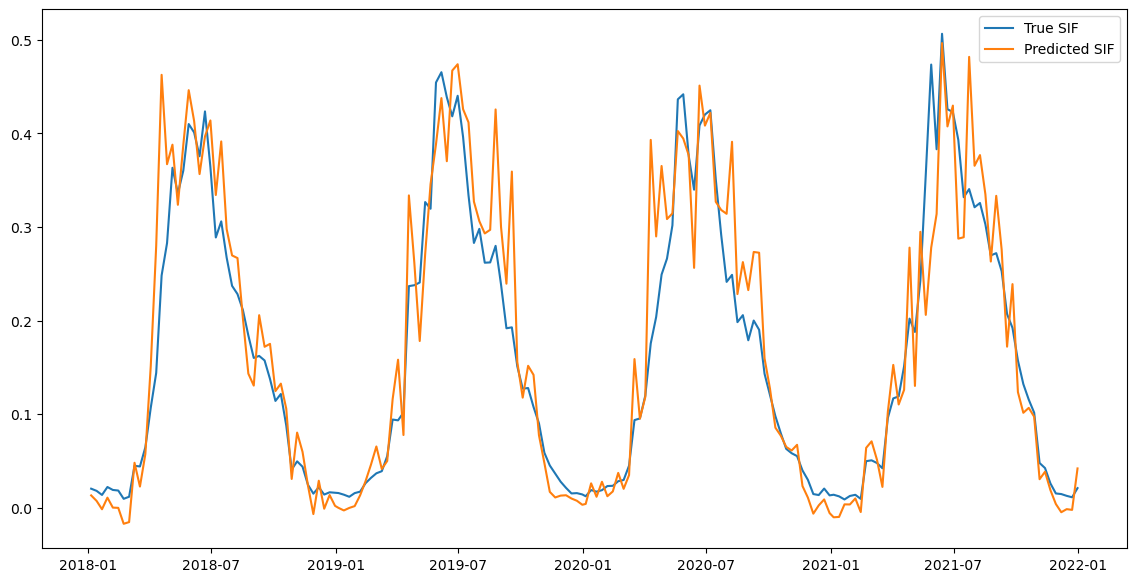

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Daten aufteilen in Trainings- und Testdaten
train_data = data[data.index.year <= 2017]
test_data = data[data.index.year >= 2018]

# Trennen der Features und des Zielwerts
X_train = train_data[['radiation_era5', 'root_moisture','air_temperature_2m']]
y_train = train_data['sif_gosif']
X_test = test_data[['radiation_era5','root_moisture', 'air_temperature_2m' ]]
y_test = test_data['sif_gosif']

# Daten normalisieren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modell erstellen
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Ausgangsschicht mit einem Neuron für die SIF-Vorhersage
])

# Modell kompilieren
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Vorhersagen für 2018
sif_pred = model.predict(X_test_scaled)

# Ergebnisse anzeigen
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(test_data.index, y_test, label='True SIF')
plt.plot(test_data.index, sif_pred, label='Predicted SIF')
plt.legend()
plt.show()
